<a href="https://colab.research.google.com/github/dmppsg/Classification_Logistic-Regression/blob/main/%C3%87ardioVascularDisease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train (2).csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['cardio_train.csv']),sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.to_csv('cardio_train.csv', index=False)
df.reset_index(drop = True).head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
#remove duplicate rows

print("{} rows are same".format(df.duplicated().sum()))

0 rows are same


In [ ]:
dp=df[df.duplicated(keep=False)]
dp=dp.sort_values(by=["age","gender","height"],ascending = False)
dp.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [ ]:
df.drop_duplicates(inplace=True)
print("{} rows are same".format(df.duplicated().sum()))

0 rows are same


In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


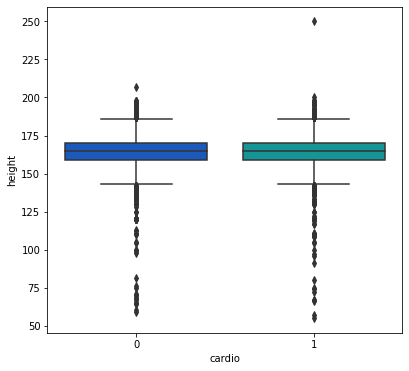

In [ ]:
#Data Visualization
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='height',data=df, palette='winter')

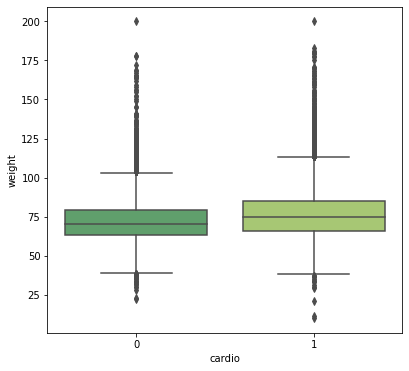

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,2)
sns.boxplot(x="cardio",y="weight",data=df,palette = 'summer')

In [ ]:
#Data Preprocessing - adding BMI to the dataset
df["bmi"]=(df["weight"]/(df["height"]/100)**2).round(1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0


In [ ]:
df=df[(df["bmi"]>10) & (df["bmi"]<100)]
#df.drop(["weight","height"],axis = 1 ,inplace=True)

In [ ]:
df=df[(df['ap_hi']<250)&(df['ap_lo']<200)]
df=df[(df['ap_hi']>20)&(df['ap_lo']>20)]
df['age']=df['age']/365
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,0.138060,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,1,0.151833,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,2,0.141543,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,3,0.132280,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,4,0.131162,1,156,56.0,100,60,1,1,0,0,0,0,23.0


In [ ]:
df['cholesterol'].unique()

array([1, 3, 2])

In [ ]:
df['cholesterol']= df['cholesterol'].map({1:'normal',2:'aboveNormal',3:'WellAboveNormal'})
df['gluc']= df['gluc'].map({1:'normal',2:'aboveNormal',3:'WellAboveNormal'})
dummies=pd.get_dummies(df[['cholesterol','gluc']])


final_df=pd.concat([df,dummies],axis=1)
final_df.drop(['cholesterol','gluc'],axis=1, inplace=True) 
final_df.head()



,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,cholesterol_WellAboveNormal,cholesterol_aboveNormal,cholesterol_normal,gluc_WellAboveNormal,gluc_aboveNormal,gluc_normal
0,0,0.138060,2,168,62.0,110,80,0,0,1,0,22.0,0,0,1,0,0,1
1,1,0.151833,1,156,85.0,140,90,0,0,1,1,34.9,1,0,0,0,0,1
2,2,0.141543,1,165,64.0,130,70,0,0,0,1,23.5,1,0,0,0,0,1
3,3,0.132280,2,169,82.0,150,100,0,0,1,1,28.7,0,0,1,0,0,1
4,4,0.131162,1,156,56.0,100,60,0,0,0,0,23.0,0,0,1,0,0,1


In [ ]:
final_df['gender']=final_df['gender']%2
final_df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,cholesterol_WellAboveNormal,cholesterol_aboveNormal,cholesterol_normal,gluc_WellAboveNormal,gluc_aboveNormal,gluc_normal
0,0,0.138060,0,168,62.0,110,80,0,0,1,0,22.0,0,0,1,0,0,1
1,1,0.151833,1,156,85.0,140,90,0,0,1,1,34.9,1,0,0,0,0,1
2,2,0.141543,1,165,64.0,130,70,0,0,0,1,23.5,1,0,0,0,0,1
3,3,0.132280,0,169,82.0,150,100,0,0,1,1,28.7,0,0,1,0,0,1
4,4,0.131162,1,156,56.0,100,60,0,0,0,0,23.0,0,0,1,0,0,1


In [ ]:
#TestTrainSplit
y=final_df['cardio']
X=final_df.drop('cardio',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=17)


In [ ]:
print('Train set shape is ',format(X_train.shape))
print('Test set shape is',format(X_test.shape))


Train set shape is  (48124, 17)
Test set shape is (20625, 17)


In [ ]:
#Logistic Regression

logreg=LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)
y_pred=pd.Series(logreg.predict(X_test))
accuracy_score(y_test,y_pred)

0.7227151515151515